<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/L20251028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):

  return (x>0)*1

def sigmoid(x):

  return 1/(1+np.exp(-x))

class Perceptron:

  def __init__(self):

    self.W = np.random.randn(2,1)
    self.b = 0

    self.dW = np.zeros_like(self.W)
    self.db = 0

    self.inputs = None

  def forward(self,x):

    self.inputs = x

    y = x @ self.W + self.b

    return sigmoid(y)

  def __call__(self,x):

    return self.forward(x)

  def backward(self,dout):

    self.dW = self.inputs.T @ dout
    self.db = np.sum(dout)

  def optimizer(self,lr=0.1):

    self.W -= lr * self.dW
    self.b -= lr * self.db

  def predict(self,x):

    out = self(x)
    pred = (out>0.5)*1

    return pred.flatten()

  def fit(self,x,y,epochs=100):

    for i in range(epochs):

      out = self(x)
      dout = out - y
      self.backward(dout)
      self.optimizer()

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1]).reshape(4,1)

ppn = Perceptron()
ppn.fit(x,y,epochs=100)
pred = ppn.predict(x)
print(pred)

[0 0 0 1]


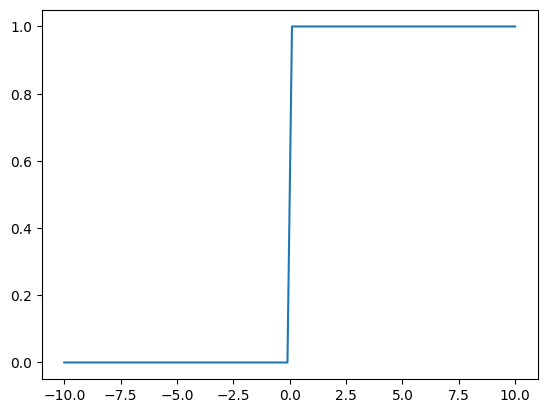

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = (x>0)*1
plt.plot(x,y)

plt.show()

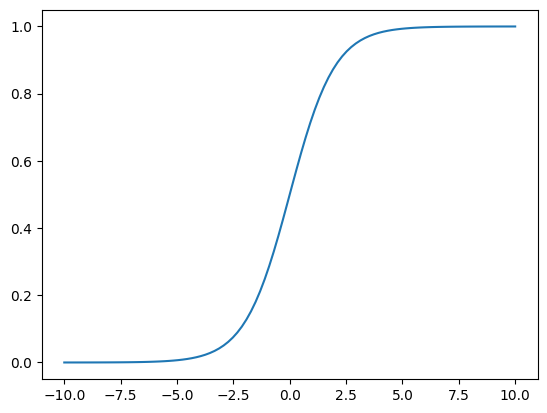

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):

  return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)

plt.show()



In [54]:
import numpy as np
import matplotlib.pyplot as plt

def onehot(x):

  k=np.max(x)+1
  y = np.identity(k)

  return y[x]


class Sigmoid:

  def __init__(self):

    None

  def __call__(self,x):

    return 1/(1+np.exp(-x))

class Linear:

  def __init__(self,d_in,d_out):

    self.W = np.random.randn(d_in,d_out)
    self.b = np.zeros(d_out)

    self.dW = np.zeros_like(self.W)
    self.db = np.zeros_like(self.b)

    self.inputs = None

  def __call__(self,x):

    self.inputs = x

    y = x @ self.W + self.b

    return sigmoid(y)


  def backward(self,dout):

    self.dW = self.inputs.T @ dout
    self.db = np.sum(dout)

  def optimizer(self,lr=0.1):

    self.W -= lr * self.dW
    self.b -= lr * self.db


class MLP:

  def __init__(self,d_in,d_h,d_out):

    self.l1 = Linear(d_in,d_h)
    self.a = Sigmoid()
    self.l2 = Linear(d_h,d_out)

  def __call__(self,x):

    x = self.l1(x)
    x = self.a(x)
    x = self.l2(x)

    return x



x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,2,3])

y = onehot(y)

d_in = x.shape[1]
d_h = 4*d_in
d_out = y.shape[1]

model = MLP(d_in,d_h,d_out)
out = model(x)
print(out)


[[0.81121424 0.39550033 0.99147477 0.08830937]
 [0.79850351 0.38630192 0.98993777 0.08155482]
 [0.8129524  0.44211948 0.98905468 0.09269428]
 [0.80087896 0.437295   0.98708542 0.08558413]]


In [46]:
x = np.array([0,1,2,1])


)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
